In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE # SMOTE - SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    7043
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# droping customer_id column as it is not important
df.drop('customerID',axis=1,inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
for column in df.columns:
  if column not in numerical_cols:
    print(column,df[column].unique())
    print("--"*20)

gender ['Female' 'Male']
----------------------------------------
SeniorCitizen [0 1]
----------------------------------------
Partner ['Yes' 'No']
----------------------------------------
Dependents ['No' 'Yes']
----------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
--------

In [14]:
df[df['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
len(df[df['TotalCharges'] == " "])

11

If we closely observe the dataset we will get that the tenure column for each 11 clients is 0 this means they started the subscription but cancelled it before end of month. Hence there payment is returned on cancellation

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0.0")
# df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"})

In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Imbalanced Dataset

Exploratory Data Analysis

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
def plot_hist(column):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column],kde=True)
  plt.title(f"Distibution of {column}")

  # getting column mean and median for plotting
  mean = df[column].mean()
  median = df[column].median()

  # adding these values to our plot
  plt.axvline(mean,color='red',linestyle='--',label='Mean')
  plt.axvline(median,color='green',linestyle='-',label='Mean')
  plt.legend() # legend is added to indicate which line corresponds to the mean and which to the median.

  plt.show()

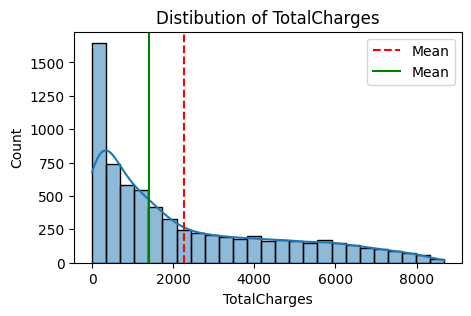

In [23]:
plot_hist('TotalCharges')

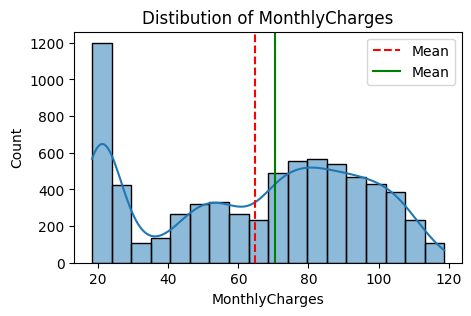

In [24]:
plot_hist('MonthlyCharges')

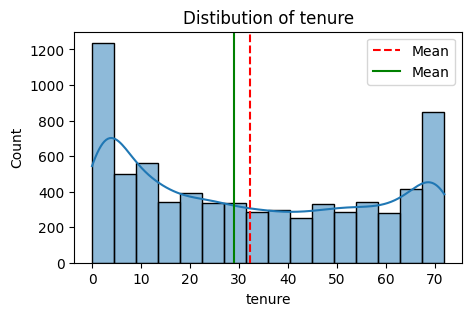

In [25]:
plot_hist('tenure')

We can not work with data that are skewed when using LogisticReg,Lasso,Linear,SVM. These models expect data to be normal distribution.
So we can perform Scaling (Standard Scaler) and model will work more effectively.

In [26]:
def plot_box(column):
  plt.figure(figsize=(5,3))
  sns.boxplot(y = df[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)

  plt.show()

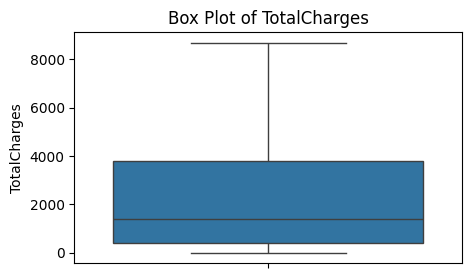

In [27]:
plot_box('TotalCharges')

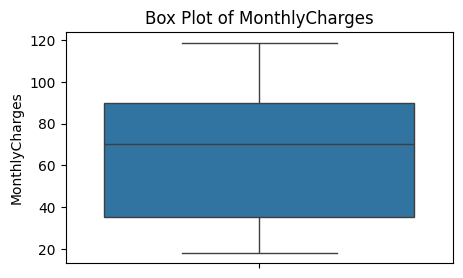

In [28]:
plot_box('MonthlyCharges')

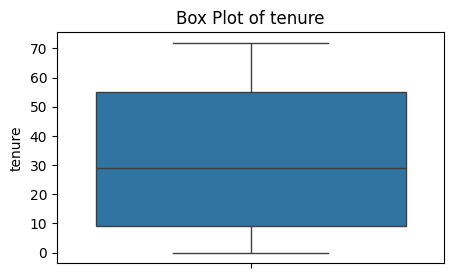

In [29]:
plot_box('tenure')

<Axes: >

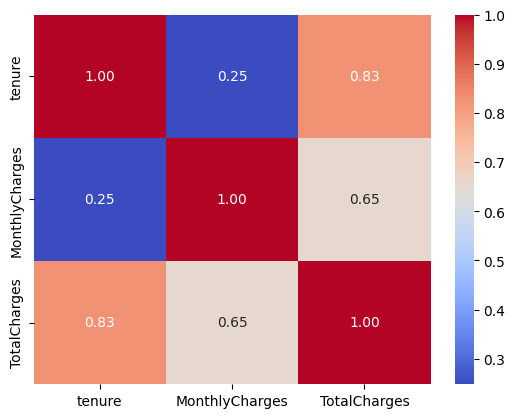

In [30]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt=".2f")

Analyzing Categorical Columns

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
obj_categorical_cols = df.select_dtypes(include="object").columns.to_list()
obj_categorical_cols = ['SeniorCitizen'] + obj_categorical_cols

In [33]:
obj_categorical_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

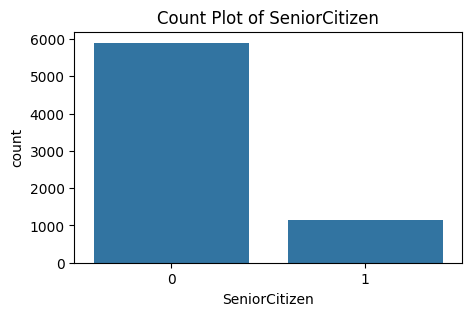

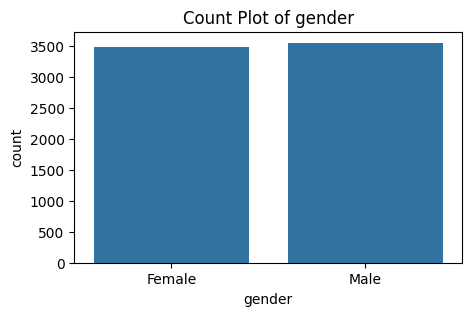

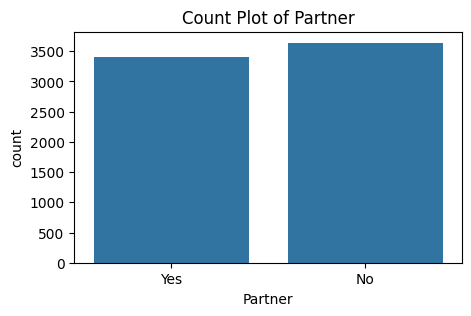

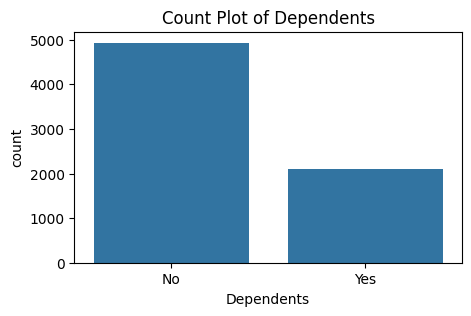

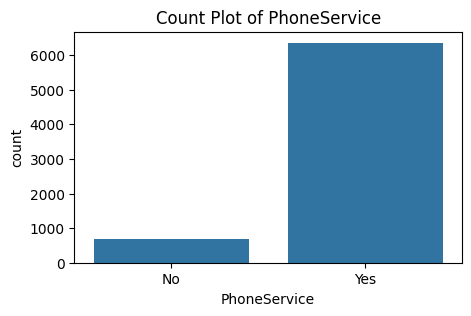

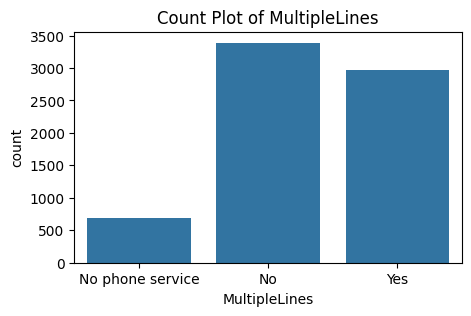

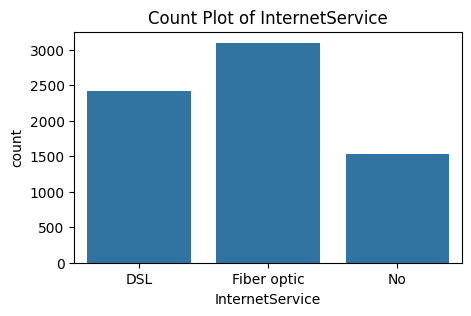

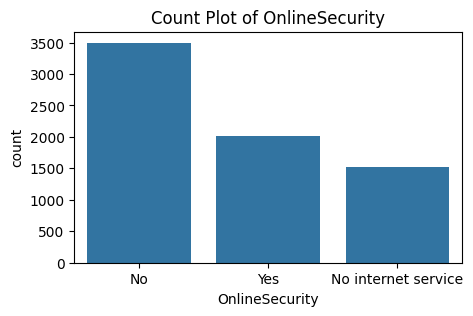

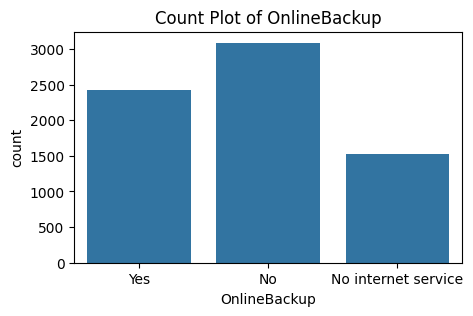

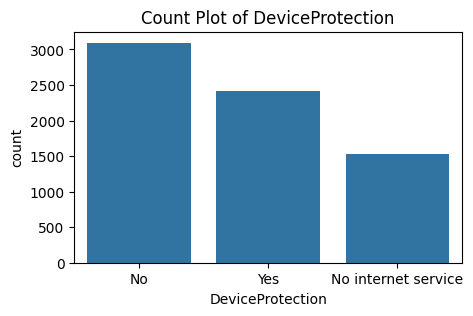

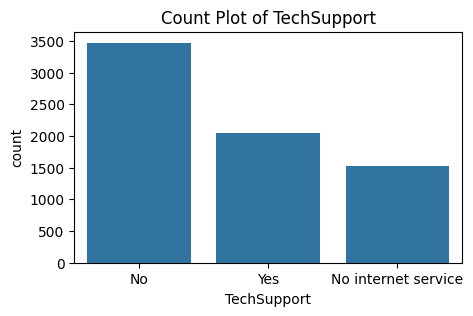

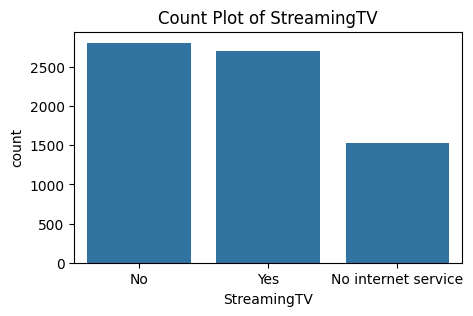

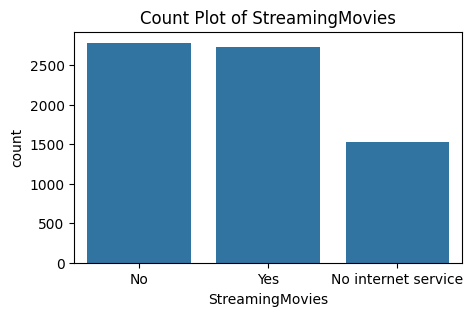

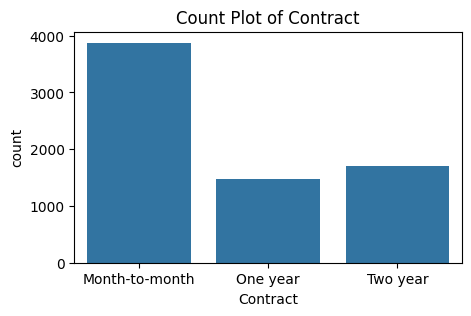

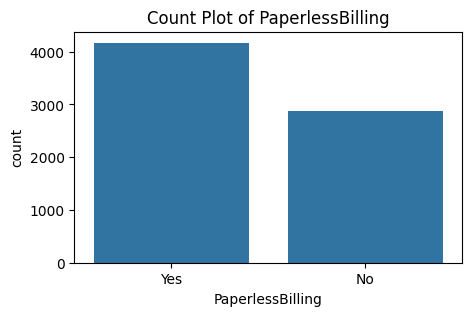

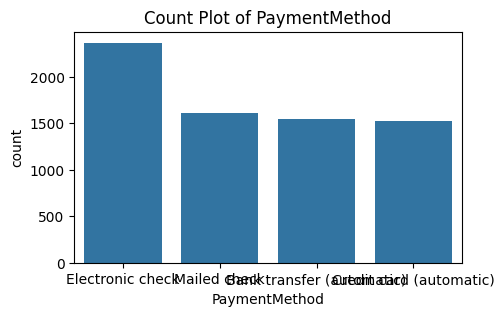

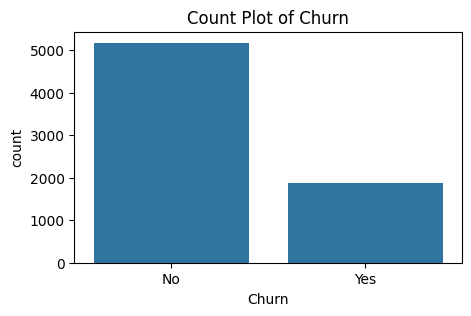

In [34]:
for col in obj_categorical_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()


Imbalance in target column is bigger issue irrespective which model you are using, whereas imbalance is feature columns can be ignored..

**Data Preprocessing

In [35]:
# Label Encoding of target column
df['Churn'] = df['Churn'].map({"No":0,"Yes":1})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Label Encoding of other categorical features

In [37]:
obj_cols = df.select_dtypes(include="object").columns

In [38]:
# columns with object dtype
encoders = {} # storing in library so that we can use it later on

# applying encoding
for column in obj_cols:
  encoder = LabelEncoder()
  df[column] = encoder.fit_transform(df[column])
  encoders[column] = encoder

# save the encoders to pickle file
with open("encoders.pkl",'wb') as f:
  pickle.dump(encoders,f)


In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [40]:
X = df.drop("Churn",axis = 1)
y = df['Churn']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [42]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling Technique (SMOTE)

In [43]:
# For imbalance in Target we use SMOTE
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [44]:
print(y_train_smote.shape)
print(y_train_smote.value_counts())

(8276,)
Churn
0    4138
1    4138
Name: count, dtype: int64


Model Trainimg

In [45]:
# Replace XGBRFClassifier in your models dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [46]:
# Dictionary to store cross_validation scores
cv_scores = {}

# Performing 5-Fold Cross Validation
for model_name,model in models.items():
  # print(model_name)
  # print(model)
  # print("-"*50)
  print(f"Training {model_name} with default parameters")
  cv_score = cross_val_score(model,X_train_smote,y_train_smote,cv = 5,scoring = "accuracy")
  cv_scores[model_name] = cv_score
  print(f"{model_name} cross_validation accuracy : {np.mean(cv_score): .2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross_validation accuracy :  0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross_validation accuracy :  0.84
----------------------------------------------------------------------


In [47]:
print(cv_scores)

{'Decision Tree': array([0.68297101, 0.71359517, 0.81873112, 0.83867069, 0.8429003 ]), 'Random Forest': array([0.72826087, 0.7776435 , 0.89848943, 0.8978852 , 0.89667674])}


Random Forest worked best here

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [50]:
y_pred = rfc.predict(X_test)

In [57]:
print("Accuracy Score : \n",accuracy_score(y_test,y_pred))
print("Classification Report : \n",classification_report(y_pred,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_pred,y_test))

Accuracy Score : 
 0.7750177430801988
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1045
           1       0.56      0.58      0.57       364

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

Confusion Matrix : 
 [[882 163]
 [154 210]]


In [62]:
model_data = {"model":rfc,"feature_names": X.columns.tolist()}

In [65]:
with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)